In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
import chromadb
from sentence_transformers import SentenceTransformer

/opt/anaconda3/envs/bigdata/lib/python3.9/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
/opt/anaconda3/envs/bigdata/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('books.csv') 

In [3]:
df

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [5]:
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [6]:
df["categories"].value_counts().to_frame() 

,count
categories,
Fiction,2588
Juvenile Fiction,538
Biography & Autobiography,401
History,264
Literary Criticism,166
...,...
Paris (France),1
Autonomy (Psychology).,1
Bombings,1


In [7]:
# as we can see there is butch of usless categories or repeting ones but with capital lettering
# also lets take a look on NaN values in dataset

In [8]:
df.isna().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [9]:
# the subtitles is mostly missing, so we can get rid of it,
# average_rating 	43
# num_pages 	43
# ratings_count 	43
# this creates a pattern, if one of the values is missing, all of them are missing

In [10]:
df.drop(columns='subtitle', inplace=True)
df

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


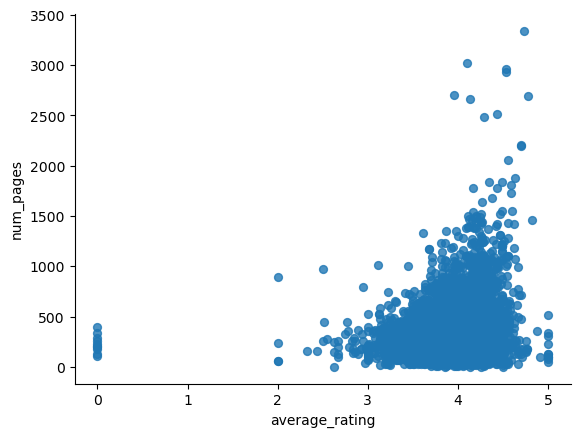

In [11]:
# @title average_rating vs num_pages
df.plot(kind='scatter', x='average_rating', y='num_pages', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

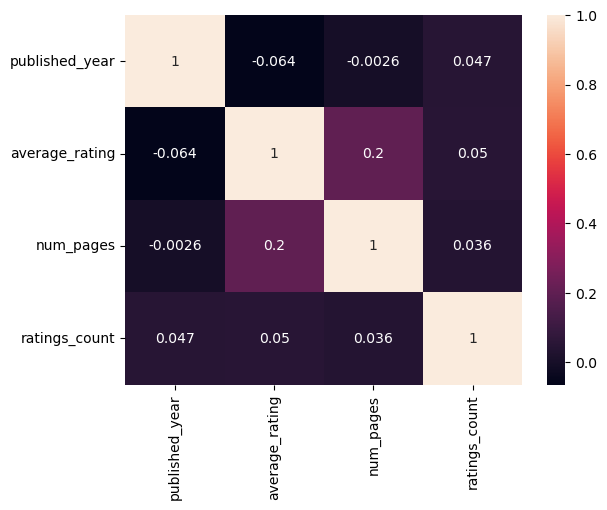

In [12]:
# @title Correlation of numeric values in df
df_numeric = df.drop(columns=['isbn10', 'isbn13'])
sns.heatmap(df_numeric.corr(numeric_only=True), annot=True)

Based on the correlation heatmap:

*   **`num_pages` and `average_rating`:** There is a weak positive correlation (0.2). This suggests that books with more pages tend to have slightly higher average ratings, but the relationship is not very strong.
*   **`ratings_count` and `average_rating`:** There is a weak positive correlation (0.05). This indicates a very weak tendency for books with more ratings to have slightly higher average ratings.
*   **`ratings_count` and `num_pages`:** There is a very weak positive correlation (0.036).

Overall, the correlations between the numeric variables in this dataset are quite weak.

In [13]:
df[
    df['average_rating'].isna()
    | df['num_pages'].isna()
    | df['ratings_count'].isna()
    | df['authors'].isna()
    | df['title'].isna()
    | df['categories'].isna()
] # as we can see the missing values is equivalent to 210 so its waaay below 5% of our population we are going to drop these too

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
16,9780006486145,0006486142,Well of Darkness,Margaret Weis;Tracy Hickman,NaN,http://books.google.com/books/content?id=XrwaA...,Gareth is just a frightened young lad when he ...,2001.0,3.66,599.0,68.0
453,9780061750588,0061750581,The Pursuit of Happyness,Chris Gardner,Biography & Autobiography,http://books.google.com/books/content?id=xUVtp...,The astounding yet true rags-to-riches saga of...,2009.0,NaN,NaN,NaN
454,9780061796067,0061796069,What A Lady Wants,Victoria Alexander,Fiction,http://books.google.com/books/content?id=ms8Sx...,One bachelor down . . . three more to go. Four...,2009.0,NaN,NaN,NaN
455,9780061796777,0061796778,A Little Bit Wicked,Victoria Alexander,Fiction,http://books.google.com/books/content?id=KPM0T...,Who will be the last unmarried man standing? N...,2009.0,NaN,NaN,NaN
456,9780061833076,006183307X,The Wit and Wisdom of Winston Churchill,James C. Humes,History,http://books.google.com/books/content?id=00d_C...,An extremely entertaining compendium of bon mo...,2009.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6785,9783125738089,3125738083,"J. D. Salinger, The Catcher in the Rye",Jerome David Salinger;Rudolph F. Rau,NaN,http://books.google.com/books/content?id=oTaRA...,NaN,1999.0,3.80,80.0,69.0
6786,9783425040844,3425040847,In the Country of Last Things,Paul Auster,NaN,http://books.google.com/books/content?id=hdWax...,NaN,2001.0,3.91,188.0,6230.0
6787,9783464371640,3464371646,About a Boy,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0
6798,9787506435673,7506435675,Good Fight,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007.0,NaN,NaN,NaN


In [14]:
df = df[
    ~df['average_rating'].isna() &
    ~df['num_pages'].isna() &
    ~df['ratings_count'].isna() &
    ~df['authors'].isna() &
    ~df['title'].isna() &
    ~df['categories'].isna() &
    ~df['thumbnail'].isna() &
    ~df['description'].isna()
]
df

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0
6805,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6808,9789027712059,9027712050,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [15]:
df.isna().sum() # no more null values

isbn13            0
isbn10            0
title             0
authors           0
categories        0
thumbnail         0
description       0
published_year    0
average_rating    0
num_pages         0
ratings_count     0
dtype: int64

<Axes: xlabel='description', ylabel='Count'>

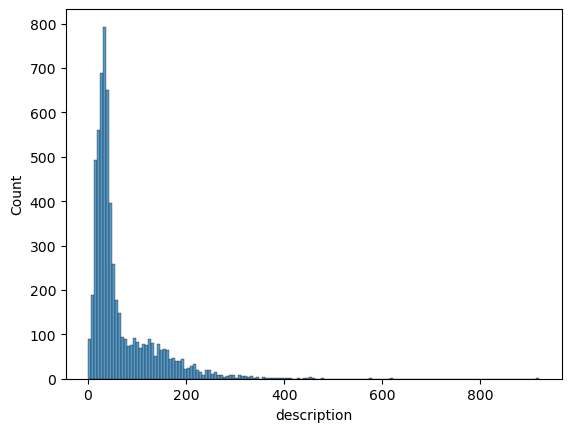

In [16]:
check_len = lambda x: len(x.split())
desc_len = df['description'].apply(check_len)
sns.histplot(desc_len)


In [17]:
df['description'][desc_len >= 20] # at this number the description are starting to make sanse, they are decent, compared to one word description

0       A NOVEL THAT READERS and critics have been eag...
1       A new 'Christie for Christmas' -- a full-lengt...
3       A memorable, mesmerizing heroine Jennifer -- b...
4       Lewis' work on the nature of love divides love...
5       "In The Problem of Pain, C.S. Lewis, one of th...
                              ...                        
6803    This book tells the tale of a man who goes on ...
6804    Wisdom to Create a Life of Passion, Purpose, a...
6805    This collection of the timeless teachings of o...
6808    Since the three volume edition ofHegel's Philo...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 5444, dtype: object

In [18]:
df = df[df['description'].apply(check_len) >= 20]
df

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
3,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
5,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0
...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0
6805,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6808,9789027712059,9027712050,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [19]:
# we can also see that description is irregular, for eg:
# A NOVEL THAT READERS and critics have been
# "In The Problem of Pain"
# some words are uppercase, or in quotes, we must also fix that

In [20]:
def clean_description(description):
    if isinstance(description, str):
        description = description.lower()
        if description.startswith('"') or description.endswith('"'):
            description = description[1:-1]
        return description
    return description

df['description'] = df['description'].apply(clean_description)
df

/var/folders/j3/k3dkzcqd7msfw4nb3b1605hh0000gn/T/ipykernel_4875/1516051971.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].apply(clean_description)


,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,a novel that readers and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,a new 'christie for christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
3,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"a memorable, mesmerizing heroine jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
5,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"in the problem of pain, c.s. lewis, one of the...",2002.0,4.09,176.0,37569.0
...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,this book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"wisdom to create a life of passion, purpose, a...",2003.0,3.82,198.0,1568.0
6805,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,this collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6808,9789027712059,9027712050,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,since the three volume edition ofhegel's philo...,1981.0,0.00,210.0,0.0


In [21]:
df['target_desc'] = df[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)
df

/var/folders/j3/k3dkzcqd7msfw4nb3b1605hh0000gn/T/ipykernel_4875/1258579604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_desc'] = df[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)


,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,target_desc
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,a novel that readers and critics have been eag...,2004.0,3.85,247.0,361.0,9780002005883 a novel that readers and critics...
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,a new 'christie for christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,9780002261982 a new 'christie for christmas' -...
3,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"a memorable, mesmerizing heroine jennifer -- b...",1993.0,3.93,512.0,29532.0,"9780006178736 a memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,9780006280897 lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"in the problem of pain, c.s. lewis, one of the...",2002.0,4.09,176.0,37569.0,"9780006280934 in the problem of pain, c.s. lew..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,this book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,9788173031014 this book tells the tale of a ma...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"wisdom to create a life of passion, purpose, a...",2003.0,3.82,198.0,1568.0,9788179921623 wisdom to create a life of passi...
6805,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,this collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,9788185300535 this collection of the timeless ...
6808,9789027712059,9027712050,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,since the three volume edition ofhegel's philo...,1981.0,0.00,210.0,0.0,9789027712059 since the three volume edition o...


In [22]:
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

In [23]:
client = chromadb.Client()

In [24]:
collection = client.create_collection(name="books")

In [25]:
for _, row in df.iterrows():
    emb = model.encode(str(row["description"])).tolist()
    collection.add(
        ids=[str(row["isbn13"])],
        embeddings=[emb],
        documents=[str(row["description"])],
        metadatas=[{
            "title": str(row["title"]),
            "authors": str(row["authors"]),
            "categories": str(row["categories"]),
            "published_year": str(row["published_year"]),
            "average_rating": str(row["average_rating"])
        }]
    )
print("Count in collection:", collection.count())

Count in collection: 5444


In [26]:
query = input("Enter book description and I try to search for recomendations for you: ")

In [28]:
query_emb = model.encode(query).tolist()

results = collection.query(
    query_embeddings=[query_emb],
    n_results= 3,
    include=['documents', 'metadatas', 'distances']
)


In [29]:
import json
import numpy as np

# We need to convert numpy arrays to lists before serializing.
def convert_numpy_to_list(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')

# Print the results as JSON to the console
print(json.dumps(results, indent=2, default=convert_numpy_to_list))

{
  "ids": [
    [
      "9780679643425",
      "9780393318685",
      "9781590525937"
    ]
  ],
  "embeddings": null,
  "documents": [
    [
      "the story of a retired detective who is called upon to solve a perplexing pair of murders is accompanied by commentary, biographical notes, and a reading group guide.",
      "tells the story of a detective who sees in a racially motivated murder case the chance to win a promotion",
      "when a university professor is found murdered, a brilliant and quick-witted homicide detective, ollie chandler, suspects the murderer could be a fellow homicide detective, but as ollie probes deeper, another detective is murdered."
    ]
  ],
  "uris": null,
  "included": [
    "documents",
    "metadatas",
    "distances"
  ],
  "data": null,
  "metadatas": [
    [
      {
        "published_year": "2006.0",
        "categories": "Fiction",
        "title": "The Murders in the Rue Morgue",
        "average_rating": "3.87",
        "authors": "Edgar All